In [11]:
import pandas as pd

In [12]:
df = pd.read_json('../data/raw/applerev.json')

In [13]:
df.head()

,date,symbol,reportedCurrency,fillingDate,acceptedDate,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2020-09-26,AAPL,USD,2020-10-30,2020-10-29 18:06:25,FY,274515000000,169559000000,104956000000,0.382332,...,0.244398,9680000000,57411000000,0.209136,3.3100,3.2800,17352119000,17528214000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2019-09-28,AAPL,USD,2019-10-31 00:00:00,2019-10-30 18:12:36,FY,260174000000,161782000000,98392000000,0.378178,...,0.252666,10481000000,55256000000,0.212381,2.9925,2.9725,18471336000,18595652000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2018-09-29,AAPL,USD,2018-11-05 00:00:00,2018-11-05 08:01:40,FY,265595000000,163756000000,101839000000,0.383437,...,0.274489,13372000000,59531000000,0.224142,3.0025,2.9775,19821508000,20000436000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2017-09-30,AAPL,USD,2017-11-03 00:00:00,2017-11-03 08:01:37,FY,229234000000,141048000000,88186000000,0.384699,...,0.279579,15738000000,48351000000,0.210924,2.3175,2.3025,20868968000,21006768000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2016-09-24,AAPL,USD,2016-10-26 00:00:00,2016-10-26 16:42:16,FY,215639000000,131376000000,84263000000,0.390760,...,0.284605,15685000000,45687000000,0.211868,2.0875,2.0775,21883280000,22001124000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


# Clean Data

In [14]:
df = df.drop(columns=['reportedCurrency', 
                      'fillingDate', 
                      'acceptedDate', 
                      'period', 
                      'link', 
                      'finalLink', 
                      'symbol', 
                      'grossProfitRatio', 
                      'incomeBeforeTaxRatio', 
                      'netIncomeRatio', 
                      'eps', 
                      'epsdiluted'])


In [15]:
df = df.sort_values("date")

In [16]:
df.to_csv('../data/interim/AppleInterimRevenue.csv', index = False)

# Data analysis

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
df = pd.read_csv('../data/interim/AppleInterimRevenueEdit.csv')

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

In [20]:
df.head()

,date,revenue,costOfRevenue,grossProfit,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,...,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeTaxExpense,netIncome,weightedAverageShsOut,weightedAverageShsOutDil
0,1985,"$1,918,300,000.00","$1,076,000,000.00","$842,300,000.00",$0.00,"$653,200,000.00",$0.00,"$695,000,000.00",$0.00,"$695,000,000.00",...,"$189,100,000.00",$0.10,"$147,300,000.00",$0.08,"-$27,200,000.00","$120,000,000.00","$58,800,000.00","$61,200,000.00","$13,708,800,000.00","$13,708,800,000.00"
1,1986,"$1,901,900,000.00","$840,000,000.00","$1,061,900,000.00",$0.00,"$737,300,000.00",$0.00,"$788,400,000.00",$0.00,"$788,400,000.00",...,"$324,600,000.00",$0.17,"$273,500,000.00",$0.14,"$36,200,000.00","$309,800,000.00","$155,800,000.00","$154,000,000.00","$14,373,333,333.00","$14,373,333,333.00"
2,1987,"$2,661,100,000.00","$1,225,700,000.00","$1,435,400,000.00",$0.00,"$993,400,000.00",$0.00,"$1,063,900,000.00",$0.00,"$1,063,900,000.00",...,"$442,000,000.00",$0.17,"$371,500,000.00",$0.14,"$38,900,000.00","$410,400,000.00","$192,900,000.00","$217,500,000.00","$14,674,698,795.00","$14,674,698,795.00"
3,1988,"$4,071,400,000.00","$1,913,200,000.00","$2,158,200,000.00",$0.00,"$1,460,200,000.00",$0.00,"$1,537,900,000.00",$0.00,"$1,537,900,000.00",...,"$698,000,000.00",$0.17,"$620,300,000.00",$0.15,"$35,800,000.00","$656,200,000.00","$255,900,000.00","$400,300,000.00","$14,556,363,636.00","$14,556,363,636.00"
4,1989,"$5,284,000,000.00","$2,570,000,000.00","$2,714,000,000.00",$0.00,"$1,954,900,000.00",$0.00,"$2,079,700,000.00",$0.00,"$2,079,700,000.00",...,"$759,100,000.00",$0.14,"$634,300,000.00",$0.12,"$110,000,000.00","$744,300,000.00","$290,300,000.00","$454,000,000.00","$14,363,841,808.00","$14,363,841,808.00"


Metrics that I need to analyze.

#### First 
* Revenue
* CostOfRevenue
* grossProfit

#### Second - Expenses
* researchAndDevelopmentExpenses 	
* generalAndAdministrativeExpenses 	
* sellingAndMarketingExpenses 	
* sellingGeneralAndAdministrativeExpenses 	
* otherExpenses 	
* operatingExpenses

#### Third - Earnings before
* ebitda
* operatingIncome
* netIncome

## Creating new frames

In [23]:
revdf = df[["date", "revenue", "costOfRevenue", "grossProfit"]]

TypeError: no numeric data to plot

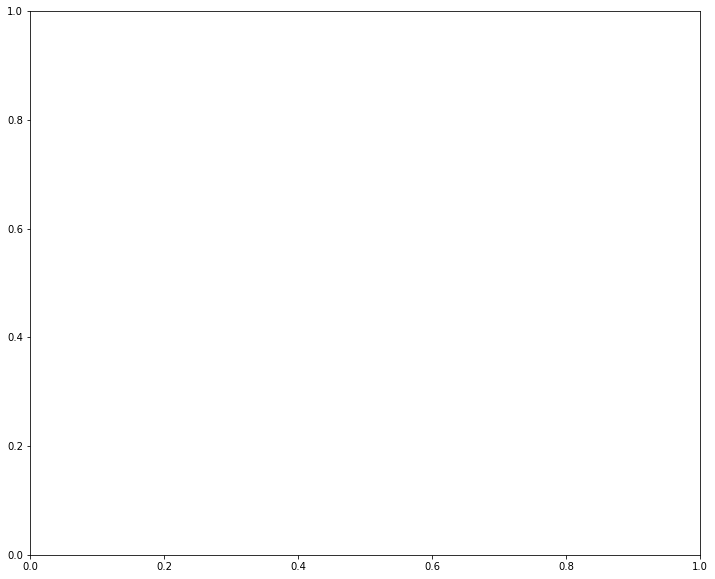

In [28]:
plt.figure();

revdf["revenue"].plot(x_compat=True);